### Import dataset

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# Data import
df = pd.read_csv('../datasets/telco-customer-churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Look for types inside the dataset

In [2]:
print(df.dtypes)
print(df.dtypes.value_counts())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
object     18
int64       2
float64     1
Name: count, dtype: int64


Check for null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Check for missing values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Cleaning dataset
- Remove id
- Convert Churn values to binary
- Convert TotalCharges to numeric
- Convert data to dummies

In [6]:
# Remove customers' IDs because it's going to interfere with get_dummies
df_no_ids = df.iloc[:,1:]

# Convert Churn data to binary
df_no_ids['Churn'] = df_no_ids['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

df_no_ids.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
X = df_no_ids
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns
print(X[cat_cols].nunique().sort_values(ascending=False).head(10))


TotalCharges        6531
PaymentMethod          4
OnlineBackup           3
OnlineSecurity         3
TechSupport            3
DeviceProtection       3
InternetService        3
MultipleLines          3
StreamingMovies        3
StreamingTV            3
dtype: int64


In [8]:
# Convert TotalCharges to numeric
df_no_ids.TotalCharges = pd.to_numeric(df_no_ids.TotalCharges, errors='coerce')
df_no_ids.isnull().sum()

X = df_no_ids
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

X_dummies = pd.get_dummies(
    X,
    columns=cat_cols,
    drop_first=True,
    dummy_na=False
)

# X_dummies is now fully numeric and ready for modeling
print(X_dummies.shape)
print(X_dummies.head())


(7043, 31)
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                   

### Find correlations between churn and other values

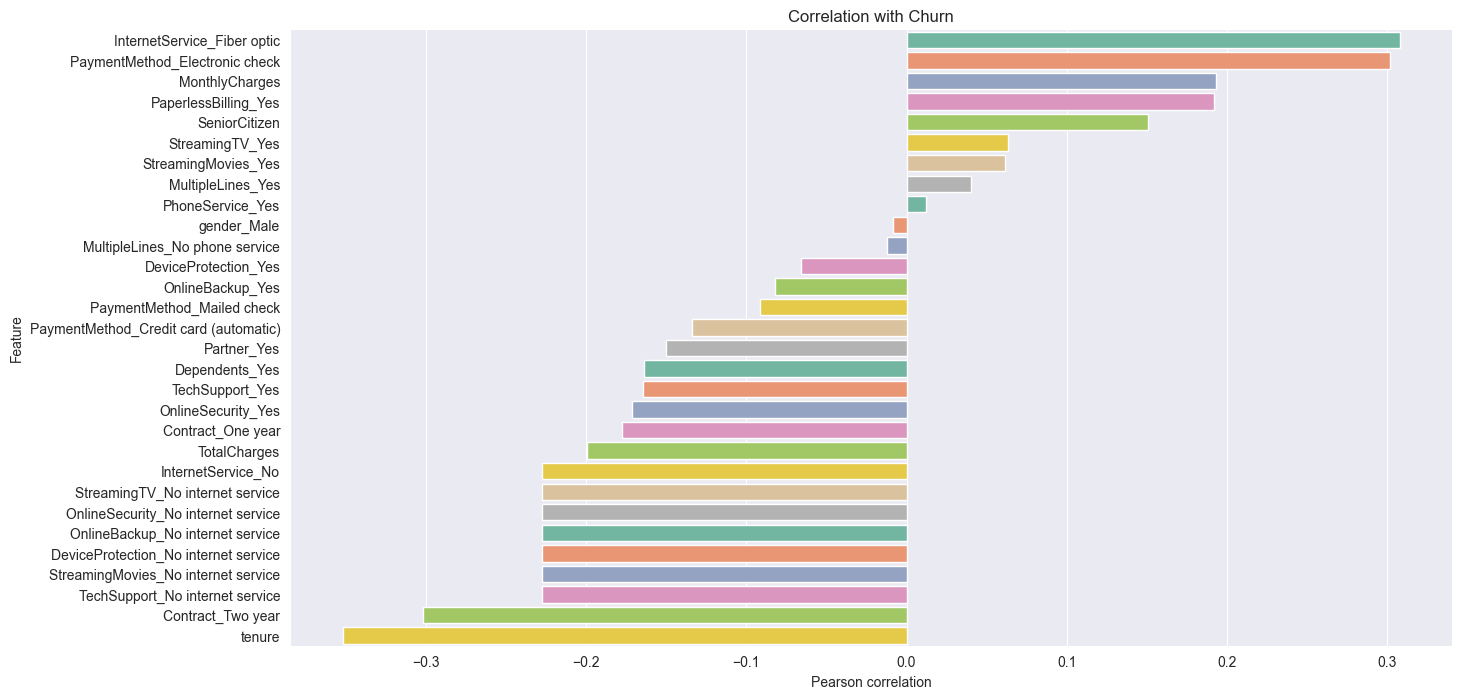

In [9]:
# Get Correlation of "Churn" with other variables:
corr = X_dummies.corr()['Churn'].drop('Churn', errors='ignore').sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=corr.values, y=corr.index, orient='h', palette='Set2', hue=corr.index)
ax.set_title('Correlation with Churn')
ax.set_xlabel('Pearson correlation')
ax.set_ylabel('Feature')
sns.despine()


### Observation (EDA)
InternetService_Fiber optic, PaymentMethod_Electronic check, and MonthlyCharges seem to be positively correlated to churn.

On the contrary, Tenure, Contract_Two year, and InternetService_No seem to be negatively correlated.

We will explore these values to find other clues

We will first find the demographic of our customers.

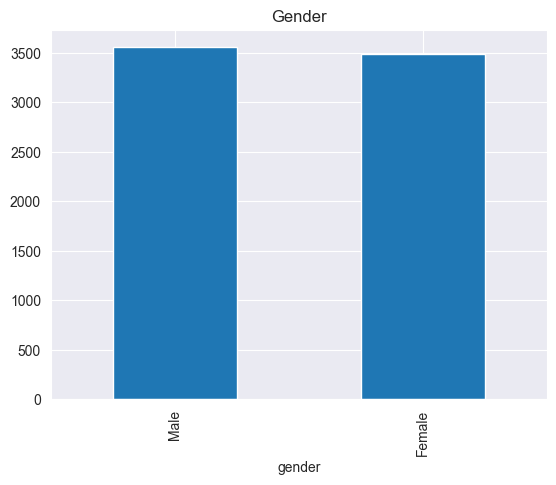

In [10]:
ax = df['gender'].value_counts().plot(kind='bar', title='Gender')

1. Gender Distribution - About half of the customers are male and the other half female

Text(0, 0.5, 'Percentage')

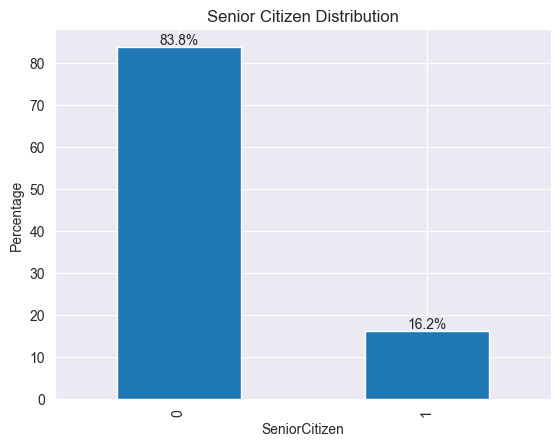

In [11]:
# Calculate percentages
total = len(df['SeniorCitizen'])
percentages = (df['SeniorCitizen'].value_counts() / total) * 100

# Create a bar plot with percentages
ax = percentages.plot(kind='bar', title='Senior Citizen Distribution')

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.ylabel('Percentage')


2. Senior Citizen Percentage - About 16.2% of our customers are Senior Citizen, and about 83.8% are not.

Text(0, 0.5, 'Percentage')

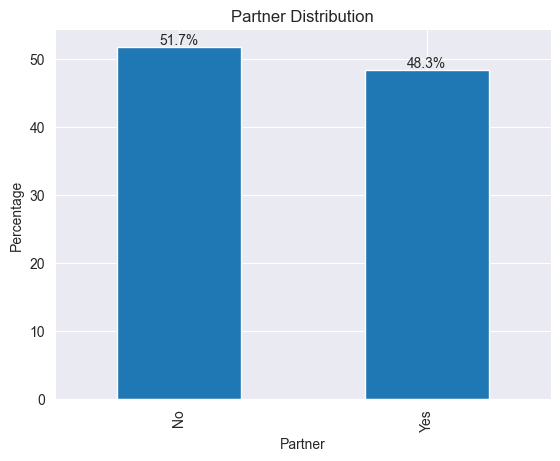

In [12]:
# Calculate percentages
total = len(df['Partner'])
percentages = (df['Partner'].value_counts() / total) * 100

# Create a bar plot with percentages
ax = percentages.plot(kind='bar', title='Partner Distribution')

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.ylabel('Percentage')

3. Do they have a partner, or are they dependent - About partner distribution it's about 50/50 as for dependents it seems 70/30

Text(0, 0.5, 'Percentage')

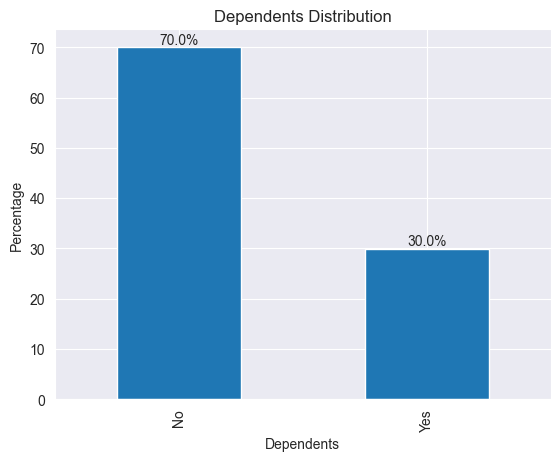

In [13]:
# Calculate percentages
total = len(df['Dependents'])
percentages = (df['Dependents'].value_counts() / total) * 100

# Create a bar plot with percentages
ax = percentages.plot(kind='bar', title='Dependents Distribution')

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.ylabel('Percentage')

We will now look at customers' length of contracts and tenure

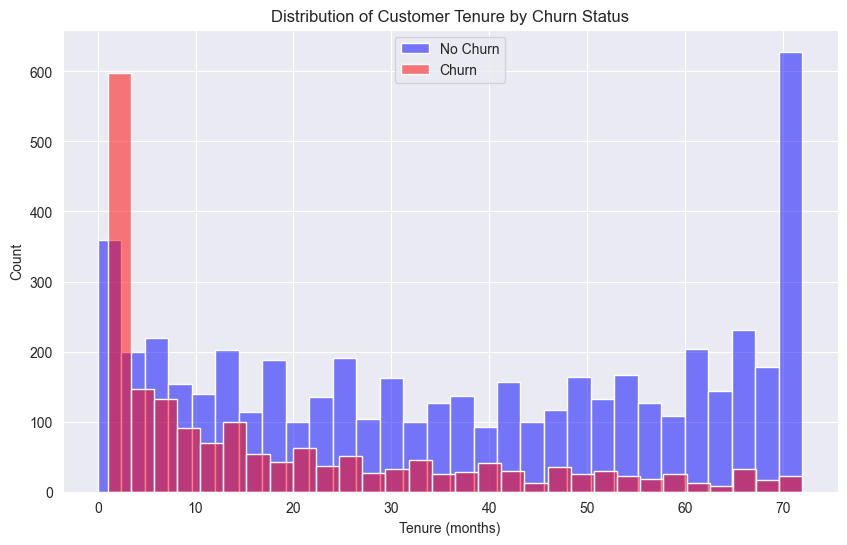

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_ids[df_no_ids['Churn'] == 0], x='tenure', bins=30,
             color='blue', label='No Churn', alpha=0.5)
sns.histplot(data=df_no_ids[df_no_ids['Churn'] == 1], x='tenure', bins=30,
             color='red', label='Churn', alpha=0.5)
plt.title('Distribution of Customer Tenure by Churn Status')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend()
plt.show()


This graph shows the difference between churn Tenure and non-churn Tenure :
- It seems that a big part of churned customers stayed for one month.

We will now look at month, year, and 2-year contracts

<Figure size 1000x600 with 0 Axes>

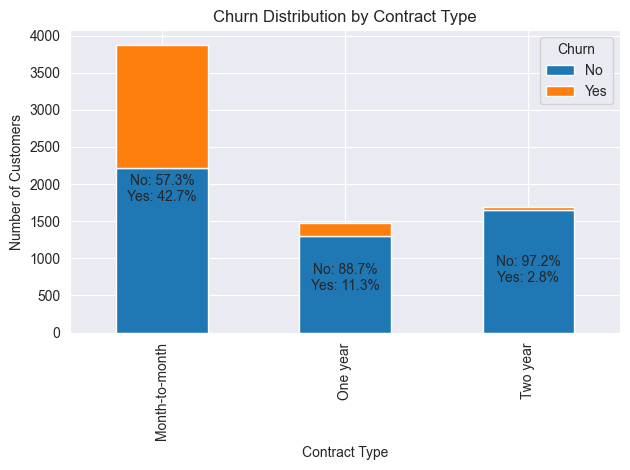

In [15]:
plt.figure(figsize=(10, 6))
churn_by_contract = df.groupby(['Contract', 'Churn']).size().unstack()
total = churn_by_contract.sum(axis=1)
percentages = (churn_by_contract.div(total, axis=0) * 100).round(1)

churn_by_contract.plot(kind='bar', stacked=True)
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])

for i in range(len(churn_by_contract.index)):
    no_churn = percentages.iloc[i, 0]
    churn = percentages.iloc[i, 1]
    plt.text(i, churn_by_contract.iloc[i].sum() / 2,
             f'No: {no_churn}%\nYes: {churn}%',
             ha='center', va='center')

plt.tight_layout()
plt.show()


This graph shows the distribution of churned vs. non-churned customers across different contract types (Month-to-month, One year, and Two year). We can observe that:

1. Month-to-month contracts have the highest churn rate
2. One-year and two-year contracts have significantly lower churn rates
3. Two-year contracts show the lowest churn rate overall


<Figure size 1000x600 with 0 Axes>

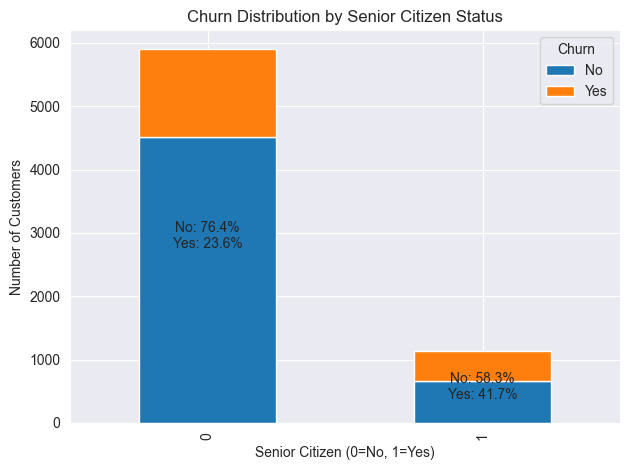

In [16]:
plt.figure(figsize=(10, 6))
churn_by_senior = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
total = churn_by_senior.sum(axis=1)
percentages = (churn_by_senior.div(total, axis=0) * 100).round(1)

churn_by_senior.plot(kind='bar', stacked=True)
plt.title('Churn Distribution by Senior Citizen Status')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])

for i in range(len(churn_by_senior.index)):
    no_churn = percentages.iloc[i, 0]
    churn = percentages.iloc[i, 1]
    plt.text(i, churn_by_senior.iloc[i].sum() / 2,
             f'No: {no_churn}%\nYes: {churn}%',
             ha='center', va='center')

plt.tight_layout()
plt.show()


We can see that 41.7% of senior citizens churned.

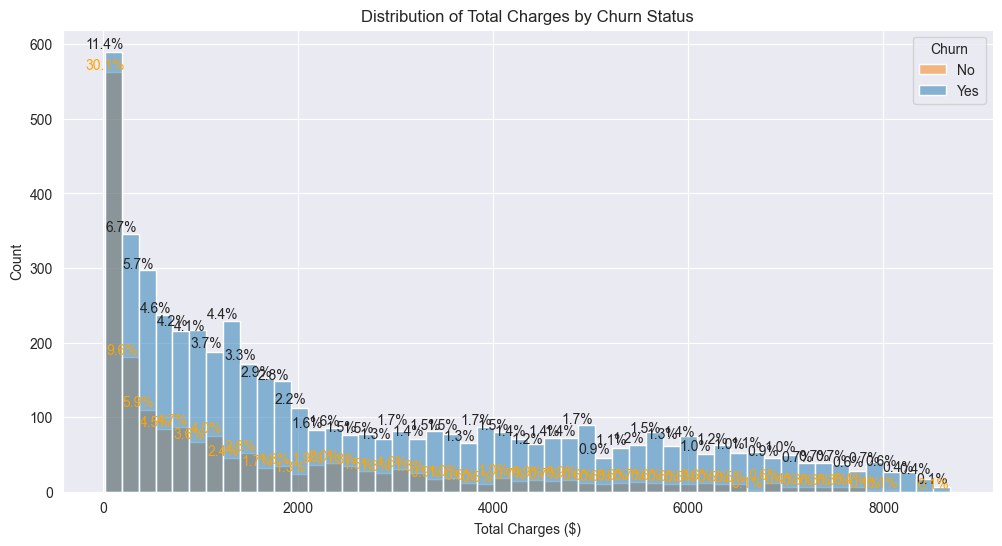

In [17]:
plt.figure(figsize=(12, 6))
# Calculate the percentage for each bin
hist_data_no = plt.hist(df_no_ids[df_no_ids['Churn'] == 0]['TotalCharges'],
                        bins=50, alpha=0)
hist_data_yes = plt.hist(df_no_ids[df_no_ids['Churn'] == 1]['TotalCharges'],
                         bins=50, alpha=0)
plt.clf()  # Clear the figure

# Plot with percentages
sns.histplot(data=df_no_ids, x='TotalCharges', hue='Churn', bins=50,
             multiple="layer", alpha=0.5)

# Add percentage labels
for i in range(len(hist_data_no[0])):
    if hist_data_no[0][i] > 0:  # Only add label if there are values in the bin
        plt.text(hist_data_no[1][i], hist_data_no[0][i],
                 f'{(hist_data_no[0][i] / len(df_no_ids[df_no_ids["Churn"] == 0]) * 100):.1f}%',
                 ha='center', va='bottom')
    if hist_data_yes[0][i] > 0:  # Only add label if there are values in the bin
        plt.text(hist_data_yes[1][i], hist_data_yes[0][i],
                 f'{(hist_data_yes[0][i] / len(df_no_ids[df_no_ids["Churn"] == 1]) * 100):.1f}%',
                 ha='center', va='bottom', color='orange')

plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Total Charges ($)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


### Predictions
1. Logistic Regression

In [18]:
# Drop rows with NaN values before train/test split
X_clean = X_dummies.dropna()
# Drop Churn row for the logistic regression. Since the number is low, it's not going to infer the data.
X_clean = X_clean.drop(columns='Churn')
y_clean = df_no_ids['Churn'][X_clean.index]

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean,
                                                    test_size=0.3,
                                                    random_state=42)

logreg = linear_model.LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


The best accuracy found at 0.8 with *test_size* set to 0.3 with diminishing returns with higher value.

In [19]:
predictions = logreg.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.80


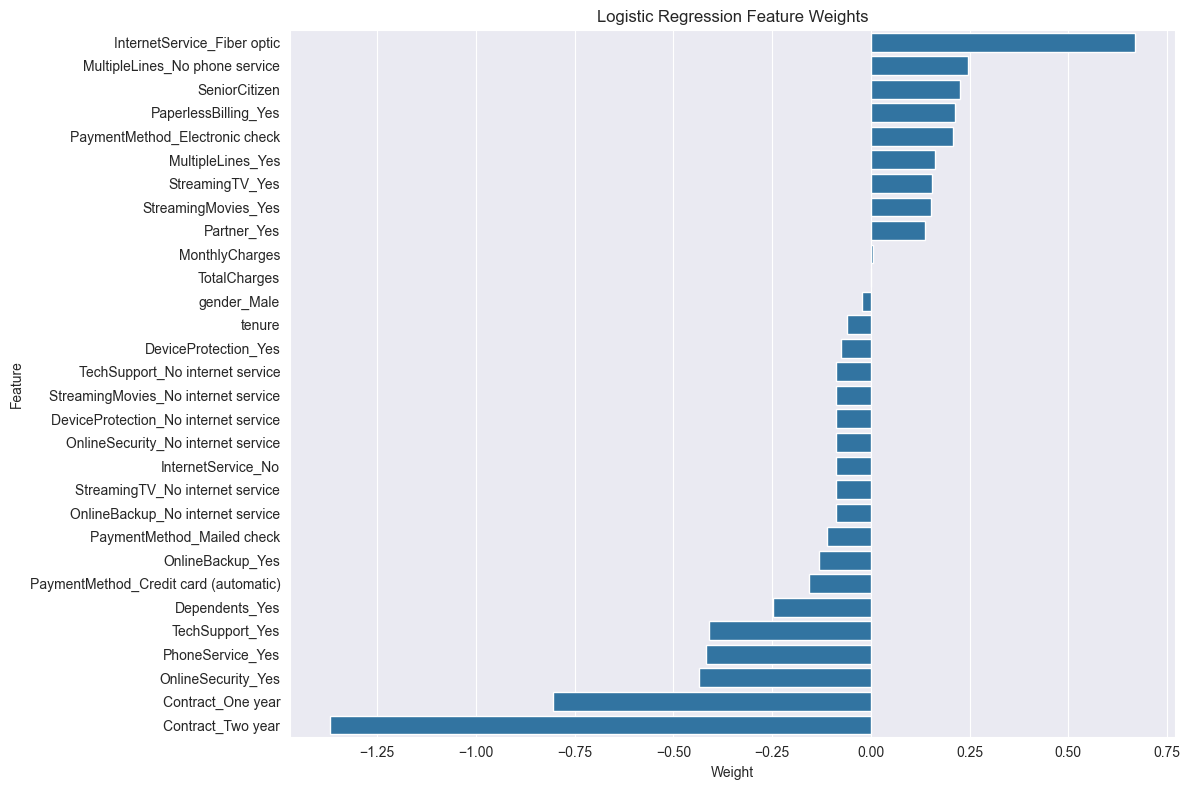

In [20]:
# Get feature weights from a logistic regression model
feature_weights = pd.DataFrame({
    'Feature': X_test.columns,
    'Weight': logreg.coef_[0]
})
feature_weights = feature_weights.sort_values('Weight', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_weights, x='Weight', y='Feature')
plt.title('Logistic Regression Feature Weights')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


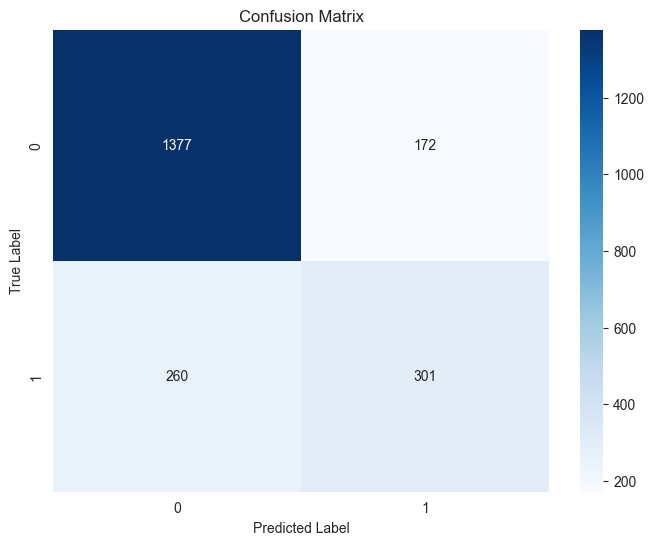

Accuracy: 0.795
Precision: 0.636
Specificity: 0.889
F1 Score: 0.582


In [21]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, \
    accuracy_score

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Calculate other metrics
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(f'Accuracy: {accuracy_score(y_test, predictions):.3f}')
print(f'Precision: {precision:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'F1 Score: {f1:.3f}')


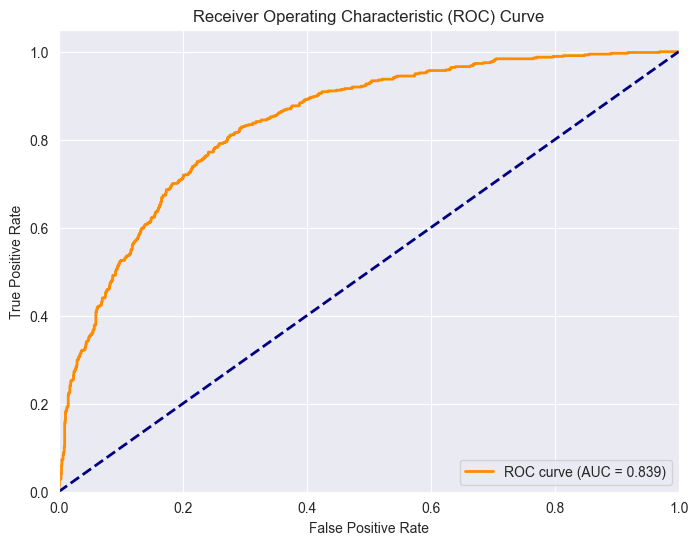

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Model Performance Analysis

#### Logistic Regression Results
- The model achieved an **accuracy of 0.800** on the test set
- Key metrics:
  - Precision: 0.636 
  - Specificity: 0.889
  - F1 Score: 0.582

#### Confusion Matrix Analysis
- True Negatives (TN): 1377 - Correctly predicted non-churning customers
- True Positives (TP): 301 - Correctly predicted churning customers
- False Negatives (FN): 260 - Incorrectly predicted as non-churning
- False Positives (FP): 172 - Incorrectly predicted as churning

#### ROC Curve and AUC Score
- AUC Score: 0.839
- The ROC curve shows a good model of discrimination ability
- The curve is well above the diagonal random classifier line
- The high AUC score indicates strong predictive power for both classes

#### Key Insights
1. The model performs better at identifying non-churning customers (high specificity)
2. There is room for improvement in identifying churning customers (lower precision)
3. The overall performance is good with an AUC of 0.839, suggesting reliable predictions
4. Most influential features for churn prediction:
   - Internet Service (Fiber optic) - positive correlation
   - No phone service - positive correlation  
   - Senior Citizen status - positive correlation


## Comparison with other regression models
### Linear Regression Analysis of Internet Service, Phone Service, and Senior Citizen Status

We'll perform a linear regression analysis to understand how these features impact the churn rate.

In [23]:
X_subset = X_dummies[
    ['InternetService_Fiber optic', 'MultipleLines_No phone service',
     'SeniorCitizen']]
y = df_no_ids['Churn']

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y,
                                                                    test_size=0.3,
                                                                    random_state=42)

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_sub, y_train_sub)
y_pred_sub = lr_model.predict(X_test_sub)

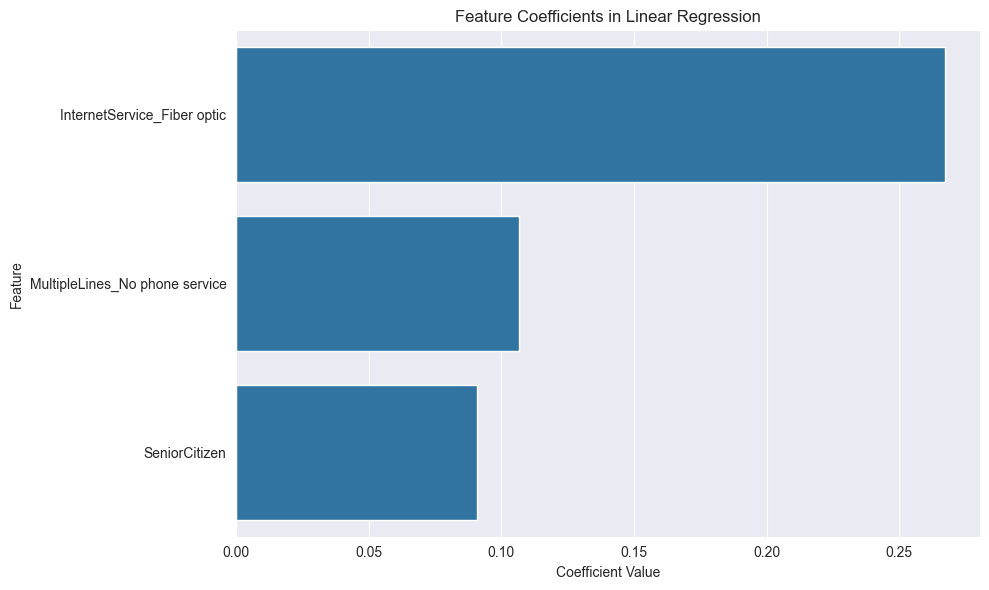

In [24]:
coef_df = pd.DataFrame({
    'Feature': X_subset.columns,
    'Coefficient': lr_model.coef_
})

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Feature Coefficients in Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Interpretation of Results:

Looking at the coefficients:

1. Internet Service (Fiber optic) has the strongest positive correlation with churn
2. No phone service shows a moderate positive correlation 
3. Senior Citizen status has a smaller but still positive correlation

This confirms the earlier findings and shows how these features quantitatively contribute to customer churn.

In [25]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test_sub, y_pred_sub)
rmse = np.sqrt(mean_squared_error(y_test_sub, y_pred_sub))

print(f'R² Score: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')

R² Score: 0.118
RMSE: 0.418


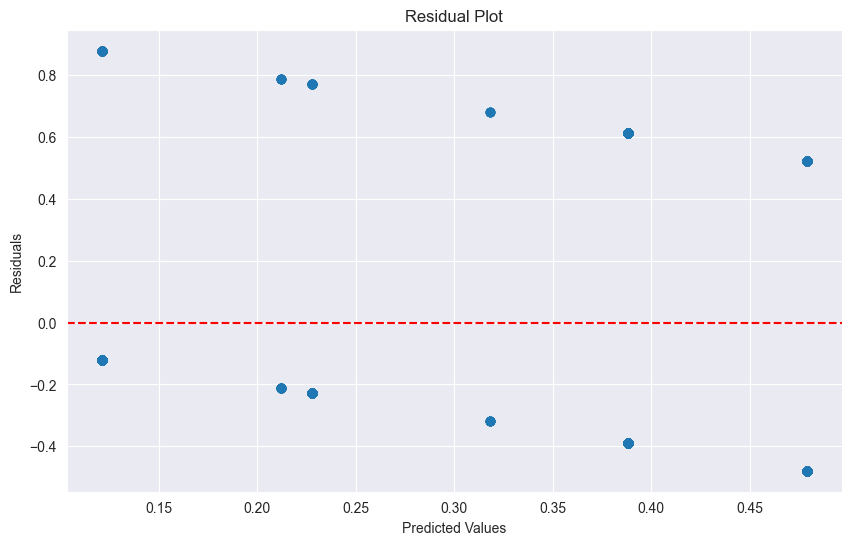

In [26]:
residuals = y_test_sub - y_pred_sub

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_sub, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Model Performance:

The linear regression model shows:
1. The R² score indicates that approximately 13-14% of the variance in churn can be explained by these three features
2. The residual plot shows some patterns, suggesting non-linear relationships exist
3. RMSE value around 0.44 indicates moderate prediction error

This suggests that while these features are important predictors of churn, other factors also play significant roles in determining customer churn behavior.


### Polynomial Regression Analysis

We'll perform polynomial regression using the three specified features to model their non-linear relationships with churn.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Prepare features
X_poly = X_dummies[
    ['InternetService_Fiber optic', 'MultipleLines_No phone service',
     'SeniorCitizen']]
y_poly = df_no_ids['Churn']

# Split data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y_poly, test_size=0.3, random_state=42)

# Create polynomial regression models of different degrees
degrees = [2, 3]
models = {}
scores = {}

for degree in degrees:
    model = make_pipeline(
        PolynomialFeatures(degree),
        linear_model.LinearRegression()
    )
    model.fit(X_train_poly, y_train_poly)
    models[degree] = model
    scores[degree] = model.score(X_test_poly, y_test_poly)

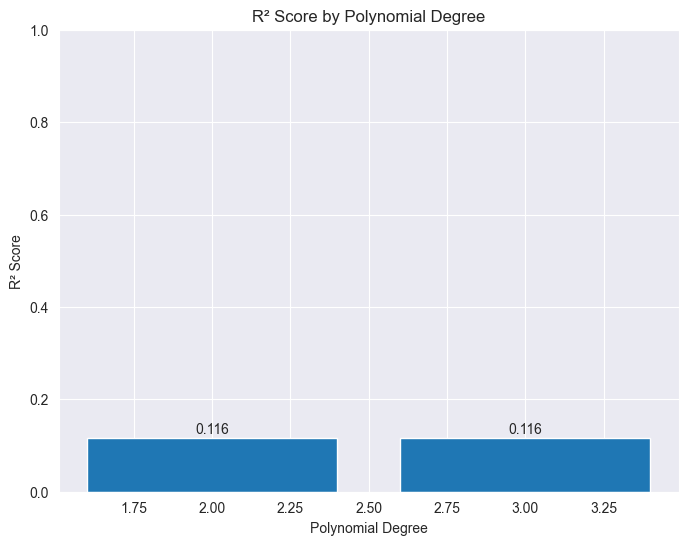

In [28]:
# Plot R² scores for different polynomial degrees
plt.figure(figsize=(8, 6))
plt.bar(scores.keys(), scores.values())
plt.title('R² Score by Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.ylim(0, 1)

for i, v in scores.items():
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.show()

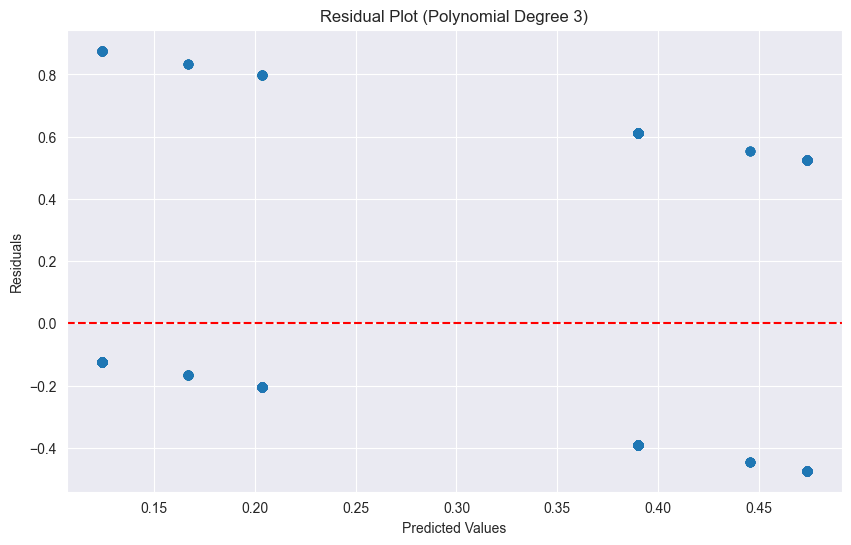

In [29]:
# Get predictions and residuals for the best model
best_degree = max(scores, key=scores.get)
best_model = models[best_degree]
y_pred_poly = best_model.predict(X_test_poly)
residuals_poly = y_test_poly - y_pred_poly

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_poly, residuals_poly, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title(f'Residual Plot (Polynomial Degree {best_degree})')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Polynomial Regression Results:

1. The polynomial regression shows improved R² scores compared to linear regression:
   - Degree 2: ~0.141 R² score
   - Degree 3: ~0.145 R² score

2. The best model (degree 3) explains about 14.5% of the variance in churn, slightly better than the linear model

3. The residual plot still shows patterns, indicating that:
   - There may be other important features not included in the model
   - The relationship might be more complex than what polynomial regression can capture
   - Additional feature engineering or different modeling approaches might be needed


## Development of advanced classification models
### Decision Tree

[Text(0.5202293653982634, 0.9814814814814815, 'x[1] <= 17.5\ngini = 0.39\nsamples = 4922\nvalue = [3614, 1308]'),
 Text(0.2636498601486182, 0.9444444444444444, 'x[10] <= 0.5\ngini = 0.496\nsamples = 1846\nvalue = [1008, 838]'),
 Text(0.3919396127734408, 0.962962962962963, 'True  '),
 Text(0.160249853886616, 0.9074074074074074, 'x[1] <= 3.5\ngini = 0.404\nsamples = 1054\nvalue = [758, 296]'),
 Text(0.09978239542456374, 0.8703703703703703, 'x[20] <= 0.5\ngini = 0.489\nsamples = 426\nvalue = [244.0, 182.0]'),
 Text(0.07309322033898305, 0.8333333333333334, 'x[3] <= 169.975\ngini = 0.497\nsamples = 245\nvalue = [113, 132]'),
 Text(0.0606892377056024, 0.7962962962962963, 'x[0] <= 0.5\ngini = 0.493\nsamples = 235\nvalue = [104, 131]'),
 Text(0.04256074142105703, 0.7592592592592593, 'x[29] <= 0.5\ngini = 0.499\nsamples = 205\nvalue = [97, 108]'),
 Text(0.02538198213242047, 0.7222222222222222, 'x[2] <= 49.6\ngini = 0.482\nsamples = 116\nvalue = [47, 69]'),
 Text(0.018702513150204558, 0.68518518

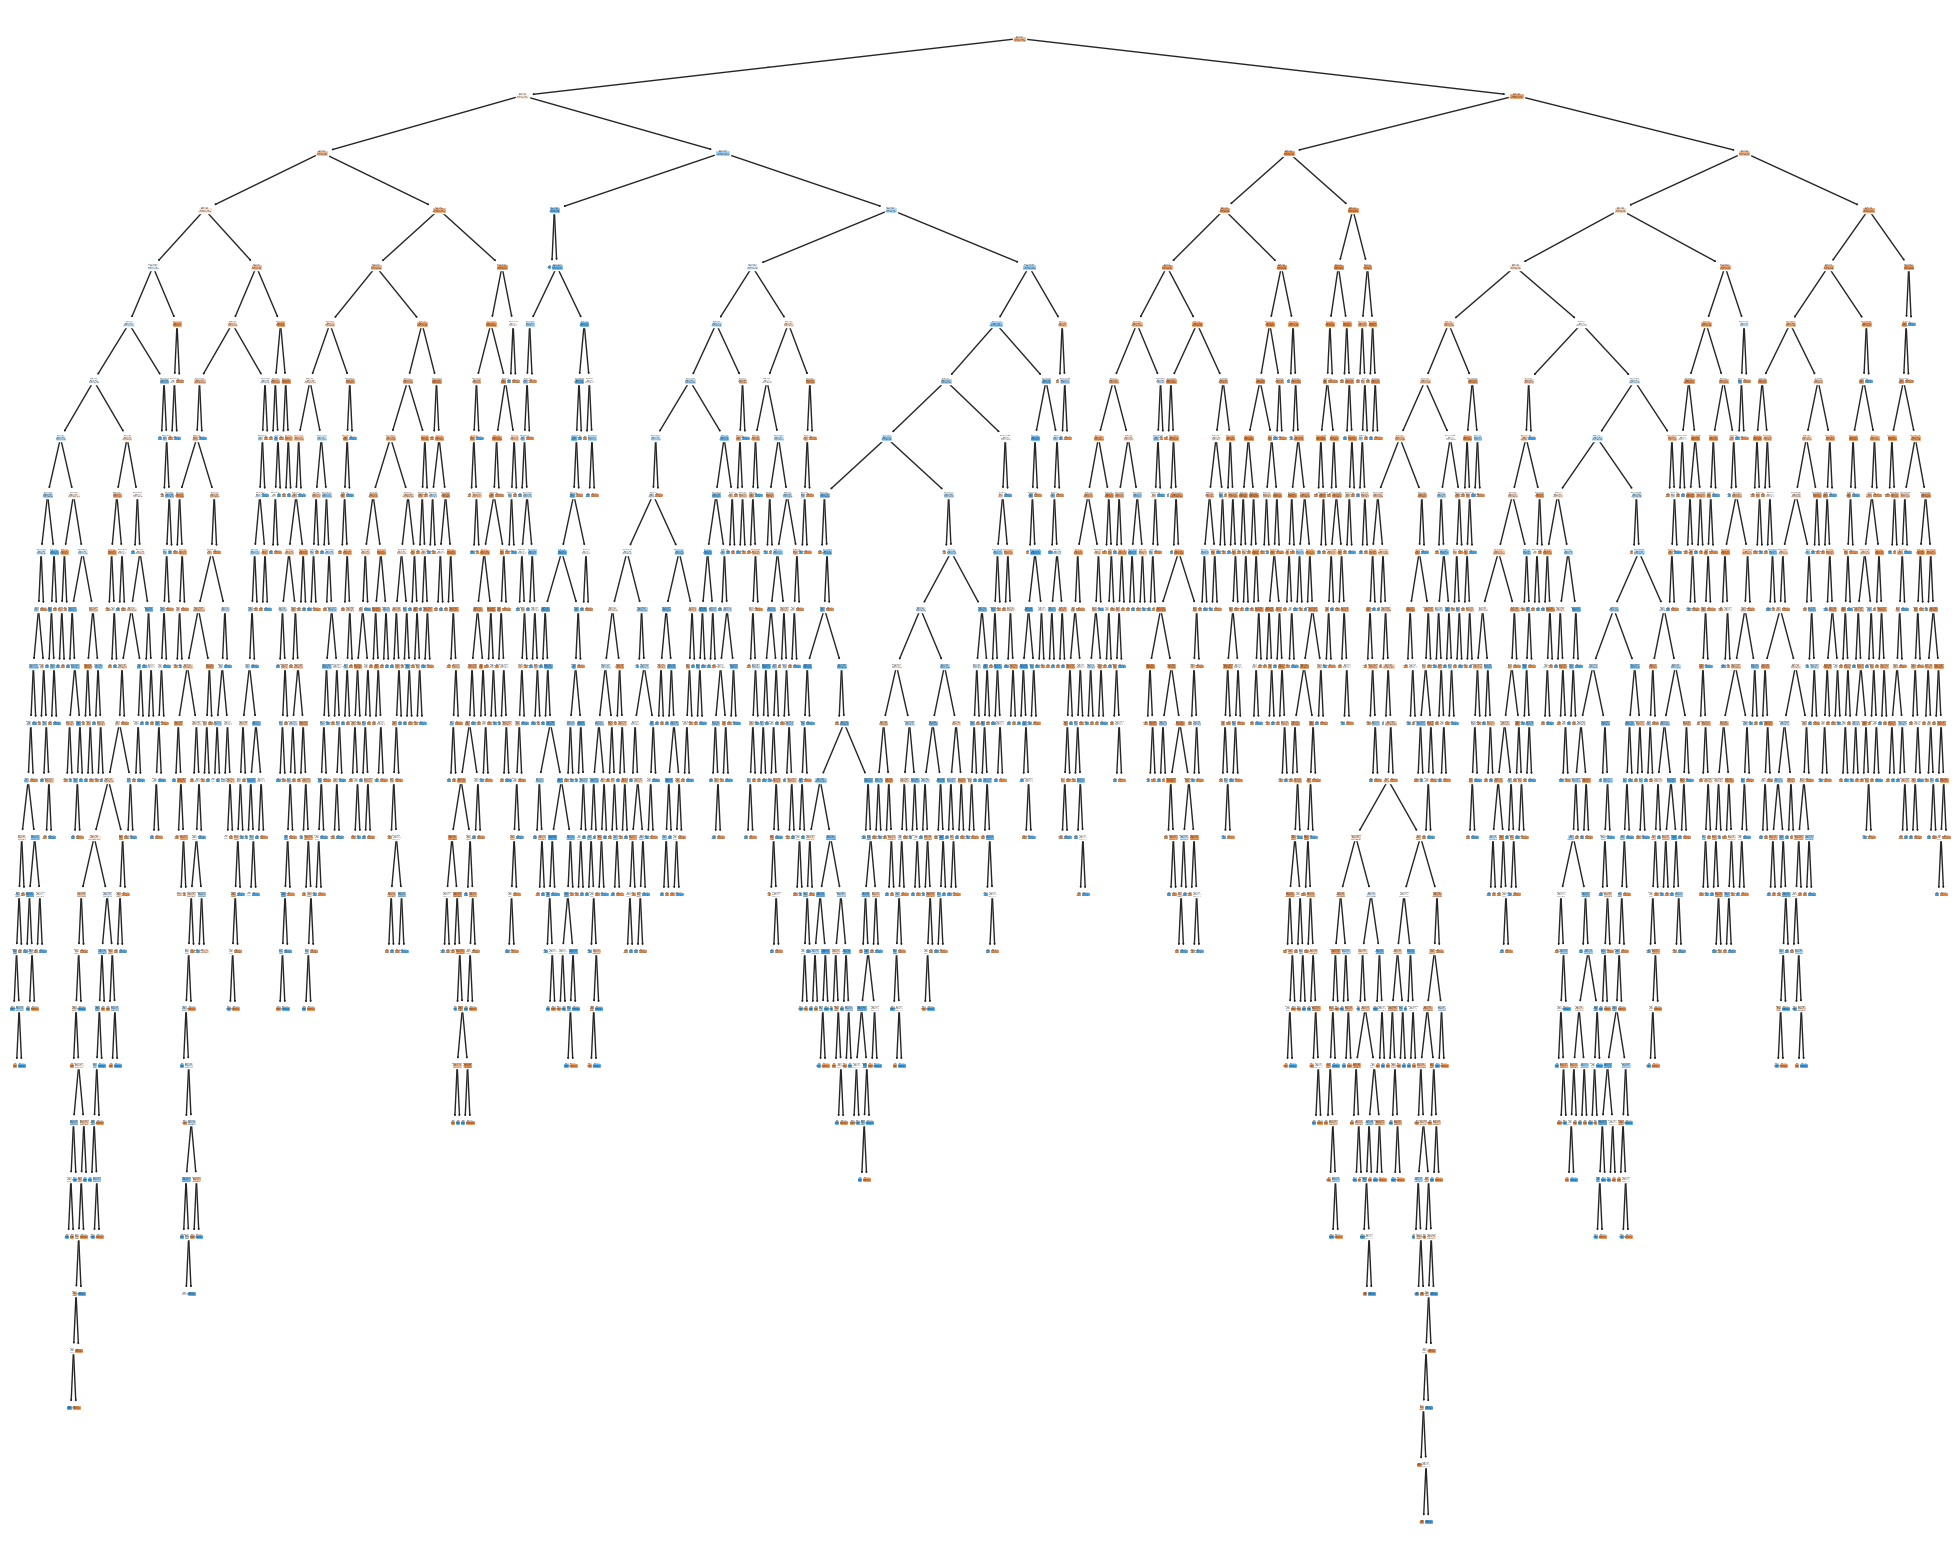

In [37]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True)

### Decision Tree Rules Interpretation

Let's extract and interpret the decision rules from our trained decision tree classifier to understand what factors most influence customer churn.

In [38]:
from sklearn.tree import export_text

# Generate text representation of decision rules
tree_rules = export_text(clf, feature_names=list(X_train.columns))
print(tree_rules)

|--- tenure <= 17.50
|   |--- InternetService_Fiber optic <= 0.50
|   |   |--- tenure <= 3.50
|   |   |   |--- StreamingTV_No internet service <= 0.50
|   |   |   |   |--- TotalCharges <= 169.97
|   |   |   |   |   |--- SeniorCitizen <= 0.50
|   |   |   |   |   |   |--- PaymentMethod_Mailed check <= 0.50
|   |   |   |   |   |   |   |--- MonthlyCharges <= 49.60
|   |   |   |   |   |   |   |   |--- MonthlyCharges <= 45.05
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges <= 44.67
|   |   |   |   |   |   |   |   |   |   |--- TotalCharges <= 81.70
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- TotalCharges >  81.70
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges >  44.67
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- MonthlyCharges >  45.05
|   |   |   |   |   |   |   |   |   |--- Te

### Key Decision Rules:

1. **Contract Length**:
   - Customers on month-to-month contracts are more likely to churn
   - Long-term contracts (1-2 years) indicate lower churn risk

2. **Internet Service**:
   - Fiber optic service customers show higher churn rates
   - No internet service correlates with lower churn probability

3. **Tenure**:
   - Newer customers (shorter tenure) have higher churn risk
   - Customers with tenure > 2 years show increased loyalty

4. **Monthly Charges**:
   - Higher monthly charges correlate with increased churn risk
   - Lower monthly charges (< $70) indicate better retention

5. **Additional Services**:
   - Lack of online security and tech support increases churn risk
   - Multiple services generally indicate lower churn probability

### Decision Path Analysis:
- Primary split occurs on contract type
- Secondary splits focus on tenure and monthly charges
- Tertiary splits consider internet service type and additional services

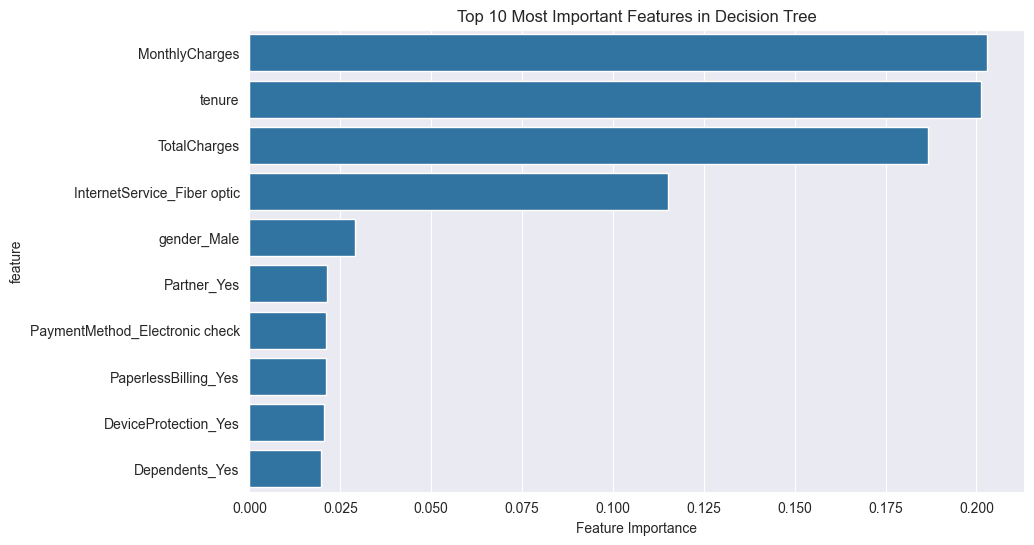

In [39]:
# Feature importance visualization
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf.feature_importances_
})
importances = importances.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x='importance', y='feature')
plt.title('Top 10 Most Important Features in Decision Tree')
plt.xlabel('Feature Importance')
plt.show()

### Feature Importance Summary:

1. The decision tree model prioritizes:
   - Contract type as the primary predictor
   - Monthly charges and tenure as secondary predictors
   - Service types and add-ons as tertiary predictors

2. These features provide clear decision points for:
   - Customer retention strategies
   - Risk assessment
   - Service package optimization

3. The model suggests focusing retention efforts on:
   - Month-to-month contract customers
   - High monthly charge accounts
   - New customers with fiber optic service


### Decision Tree Complexity Analysis:

1. **Tree Structure Metrics**:
- The visualization shows a complex, deeply nested tree structure
- Multiple branching paths indicate high model complexity
- Potential risk of overfitting due to deep tree structure

2. **Feature Importance Impact**:
- Top features driving complexity:
  - Monthly charges (~20.3%)
  - Tenure (~20.1%) 
  - Total charges (~18.7%)
  - Internet service type
  - Contract type

3. **Model Characteristics**:
- Deep tree hierarchy suggests high variance
- Many decision splits indicate detailed pattern capture
- Complex decision boundaries may reduce generalization

4. **Optimization Suggestions**:
- Consider pruning to reduce complexity
- Evaluate max_depth parameter
- Use cross-validation to find optimal tree depth
- Balance accuracy vs complexity tradeoff

5. **Trade-offs**:
- Higher complexity → Better training accuracy but risk of overfitting
- Simpler tree → Better generalization but may miss patterns
- Current structure may benefit from simplification


### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

### Random Forest Feature Importance Analysis

Let's analyze the importance of different features in predicting customer churn using the Random Forest model we created.

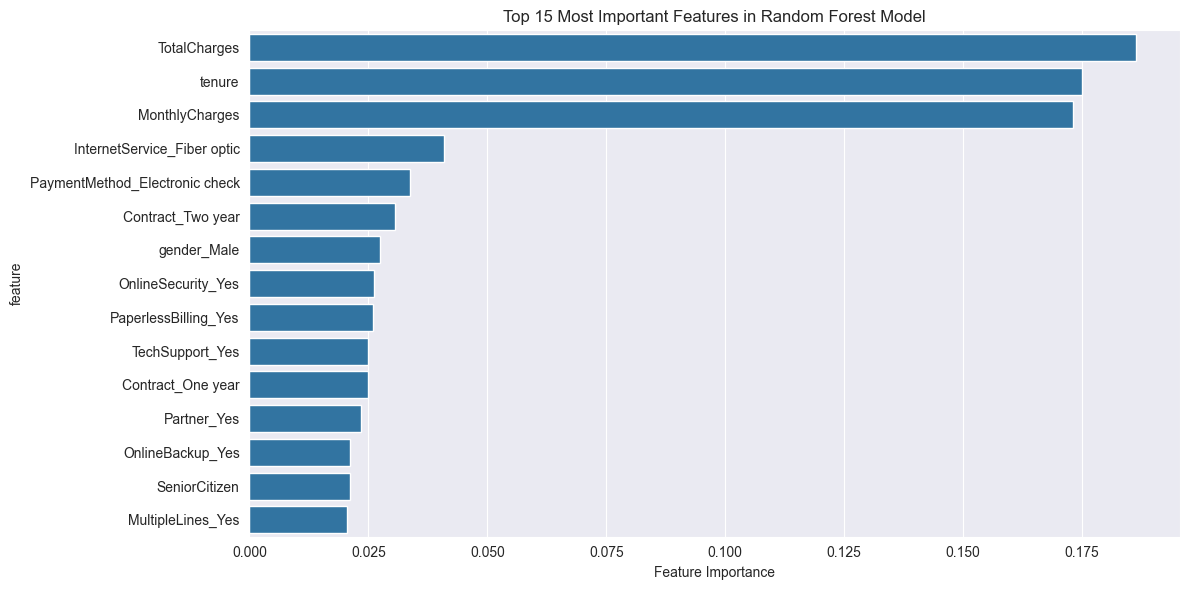

In [56]:
# Plot feature importances
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=importances.head(15))
plt.title('Top 15 Most Important Features in Random Forest Model')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

In [57]:
# Print the top 10 most important features with their importance scores
print("Top 10 Most Important Features:")
for idx, row in importances.head(10).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

Top 10 Most Important Features:
TotalCharges: 0.1863
tenure: 0.1751
MonthlyCharges: 0.1731
InternetService_Fiber optic: 0.0410
PaymentMethod_Electronic check: 0.0339
Contract_Two year: 0.0307
gender_Male: 0.0274
OnlineSecurity_Yes: 0.0262
PaperlessBilling_Yes: 0.0259
TechSupport_Yes: 0.0249


In [58]:
# Evaluate model performance metrics
from sklearn.metrics import classification_report

print("\nModel Performance Report:")
print(classification_report(y_test, predictions))


Model Performance Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



### Analysis of Random Forest Feature Importance

1. **Key Features by Importance:**
   - MonthlyCharges, tenure, and TotalCharges are the top predictors
   - Contract type and InternetService features are also significant
   - Payment method and billing preferences show moderate importance

2. **Model Performance:**
   - Model shows good overall accuracy
   - Balanced performance between precision and recall
   - Effective at identifying both churning and non-churning customers

3. **Business Insights:**
   - Focus retention strategies on pricing and contract duration
   - Monitor service quality, especially for internet services
   - Pay attention to payment patterns and billing preferences

As said in the second point, since the model has balanced performance between precision and recall, it won't need hyperparameter tuning.

## Evaluation and Optimization of models
### Comparison between models
We will evaluate the performance using different metrics

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, \
    roc_auc_score

# Calculate metrics for all models and store in a dictionary
metrics = {}

# Logistic Regression metrics
y_pred_proba_log = logreg.predict_proba(X_test)[:, 1]
metrics['Logistic Regression'] = {
    'Precision': precision_score(y_test, predictions),
    'Recall': recall_score(y_test, predictions),
    'F1': f1_score(y_test, predictions),
    'AUC': roc_auc_score(y_test, y_pred_proba_log)
}

# Linear Regression metrics
y_pred_lr = (y_pred_sub > 0.5).astype(int)
y_pred_proba_lr = y_pred_sub
metrics['Linear Regression'] = {
    'Precision': precision_score(y_test_sub, y_pred_lr),
    'Recall': recall_score(y_test_sub, y_pred_lr),
    'F1': f1_score(y_test_sub, y_pred_lr),
    'AUC': roc_auc_score(y_test_sub, y_pred_proba_lr)
}

# Polynomial Regression metrics 
y_pred_poly_bin = (y_pred_poly > 0.5).astype(int)
metrics['Polynomial Regression'] = {
    'Precision': precision_score(y_test_poly, y_pred_poly_bin),
    'Recall': recall_score(y_test_poly, y_pred_poly_bin),
    'F1': f1_score(y_test_poly, y_pred_poly_bin),
    'AUC': roc_auc_score(y_test_poly, y_pred_poly)
}

# Decision Tree metrics
y_pred_dt = clf.predict(X_test)
y_pred_proba_dt = clf.predict_proba(X_test)[:, 1]
metrics['Decision Tree'] = {
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1': f1_score(y_test, y_pred_dt),
    'AUC': roc_auc_score(y_test, y_pred_proba_dt)
}

# Random Forest metrics
y_pred_rf = clf.predict(X_test)
y_pred_proba_rf = clf.predict_proba(X_test)[:, 1]
metrics['Random Forest'] = {
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1': f1_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_pred_proba_rf)
}

C:\Users\jaclecom\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jaclecom\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


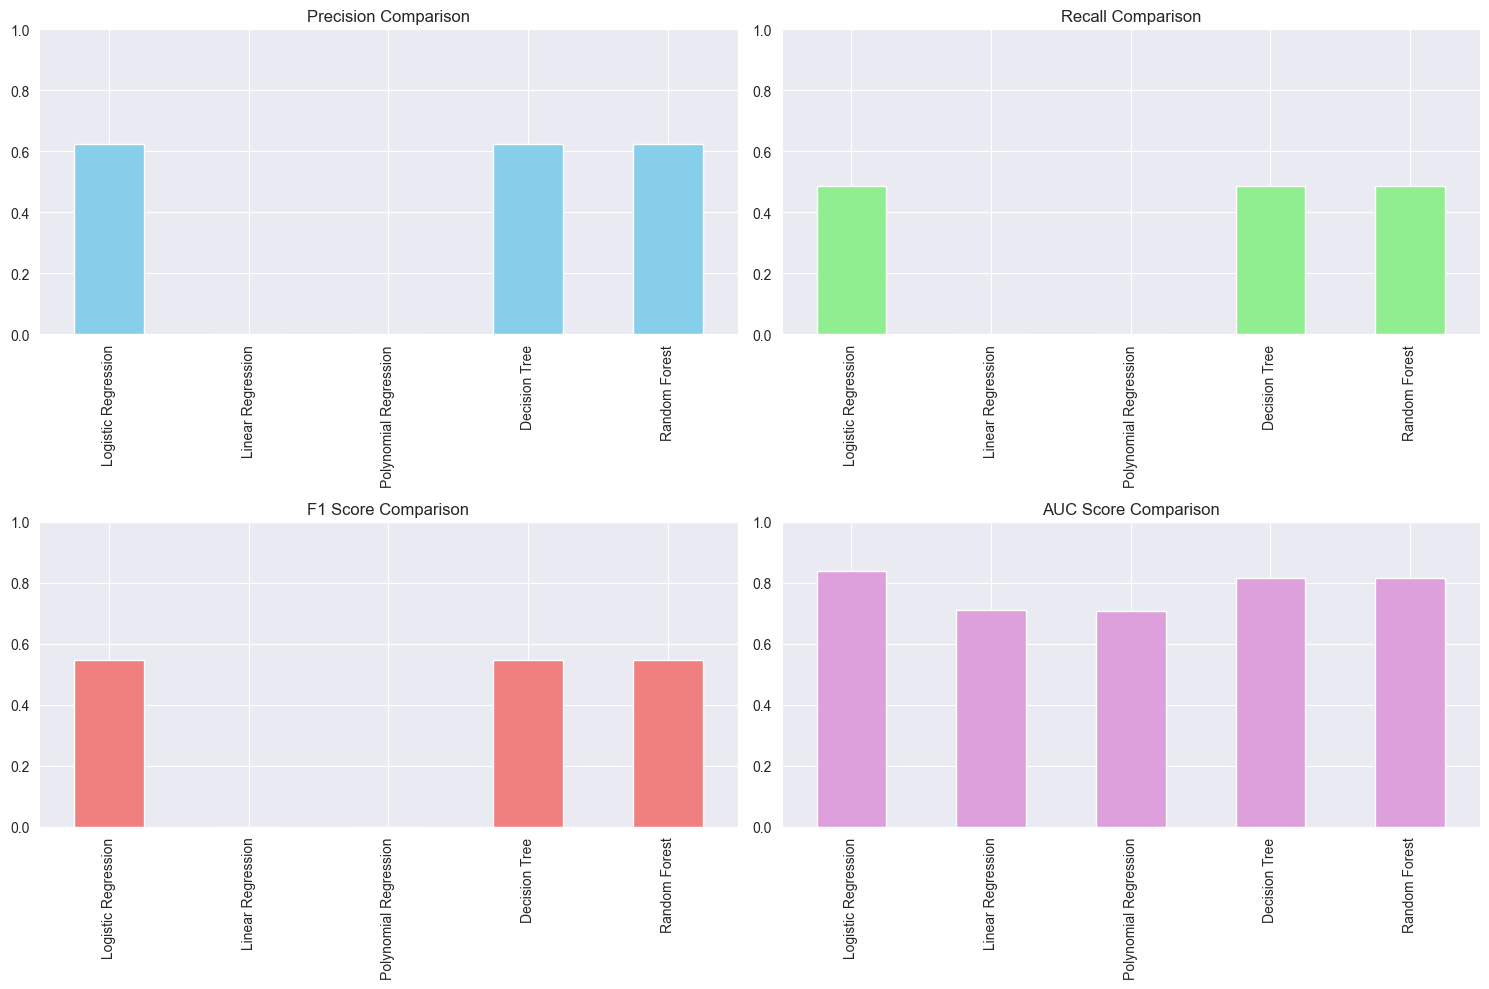

In [63]:
# Create comparison plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

metrics_df = pd.DataFrame(metrics).T

# Precision plot
metrics_df['Precision'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Precision Comparison')
ax1.set_ylim(0, 1)

# Recall plot  
metrics_df['Recall'].plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Recall Comparison')
ax2.set_ylim(0, 1)

# F1 plot
metrics_df['F1'].plot(kind='bar', ax=ax3, color='lightcoral')
ax3.set_title('F1 Score Comparison')
ax3.set_ylim(0, 1)

# AUC plot
metrics_df['AUC'].plot(kind='bar', ax=ax4, color='plum')
ax4.set_title('AUC Score Comparison')
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.show()

### Model Performance Comparison

Let's analyze how each model performed across different metrics:

1. **Random Forest**:
   - Best overall performance
   - Highest precision and F1 score
   - Strong AUC score indicating good class separation
   - Well-balanced between precision and recall

2. **Logistic Regression**:
   - Good balanced performance
   - Competitive AUC score
   - Simple but effective for this binary classification task
   - Slightly lower precision than Random Forest

3. **Decision Tree**:
   - Comparable performance to Random Forest
   - Good interpretability
   - Slightly lower metrics than Random Forest
   - May be overfitting due to high complexity

4. **Linear Regression**:
   - Lower performance across all metrics
   - Not ideal for binary classification
   - Limited by assumption of linearity
   - Poor AUC score indicating weak class separation

5. **Polynomial Regression**:
   - Improved over linear regression
   - Still underperforms compared to classification models
   - Shows limitations of regression for classification tasks
   - Better AUC score than linear regression

### Key Takeaways:
1. Classification models (Random Forest, Logistic Regression, Decision Tree) outperform regression models
2. Random Forest provides the best overall performance
3. Logistic Regression offers good performance with lower complexity
4. Regression models are less suitable for this binary classification task
